# Mean / median imputation with Scikit-learn ==> SimpleImputer


Scikit-learn provides a class to perform the most common data imputation techniques.

The **SimpleImputer** provides basic strategies for imputing missing values, including:

- Mean and median imputation for numerical variables
- Most frequent category imputation for categorical variables
- Arbitrary value imputation for both categorical and numerical variables

## Advantages

- Simple to use if applied to the entire dataframe
- Fast computation (it uses numpy for calculations)
- Imputes several types of values (you can indicate if the missing values are np.nan, or zeroes, etc)

## Limitations

- Returns a numpy array by default
- Modifies entire dataframe

## More details about the transformers

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


## Dataset:

To download the House Prices dataset, please refer to the lecture **Datasets** in **Section 2** of this course.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# transformers to impute missing data with sklearn:

from sklearn.impute import SimpleImputer #new
from sklearn.compose import ColumnTransformer #new

# to split the datasets
from sklearn.model_selection import train_test_split

In [ ]:
# We use only the following variables for the demo

cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [ ]:
# let's load the House Prices dataset

data = pd.read_csv("../../Datasets/houseprice.csv", usecols=cols_to_use)

data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [ ]:
# let's check the misssing data

X_train.isnull().mean()

LotFrontage    0.184932
OverallQual    0.000000
MasVnrArea     0.004892
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.052838
WoodDeckSF     0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

# SimpleImputer - default

In [ ]:
# Set up the simple imputer to impute with the median.

imputer = SimpleImputer(strategy="median") #using median strategy

# We fit the imputer to the train set.
# The imputer will learn the median of all variables.

imputer.fit(X_train) # finding medians for each column of the train set

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


**Note, if you want to do mean imputation instead of median, pass the argument `'mean'` to `'strategy'`.**

In [ ]:
# We can look at the learnt medians like this:

imputer.statistics_ #note, we have 9 columns, so 9 medians

array([  69. ,    6. ,    0. ,  486.5,  992. , 1095. , 1479. , 1979. ,
          0. ])

In [ ]:
# And we can investigate the medians directly to corroborate
# the imputer did a good job:

X_train.median() # another way to get the medians

LotFrontage      69.0
OverallQual       6.0
MasVnrArea        0.0
BsmtUnfSF       486.5
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
GarageYrBlt    1979.0
WoodDeckSF        0.0
dtype: float64

**Note** that SimpleImputer learns the medians of ALL the variables in the dataset, those with NA and those without NA.

In [ ]:
# Now we impute the train and test sets.

# NOTE: the data is returned as a numpy array!!!

# we apply the median value in the train set and test set


X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[  69.,    7.,  573., ..., 2034., 1998.,  576.],
       [  69.,    6.,    0., ..., 1291., 1996.,  307.],
       [  50.,    5.,    0., ...,  858., 1979.,  117.],
       ...,
       [  68.,    6.,    0., ..., 1902., 1978.,    0.],
       [  69.,    7.,   18., ..., 1557., 2003.,  143.],
       [  58.,    7.,   30., ..., 1839., 1998.,    0.]], shape=(1022, 9))

In [ ]:
# If we wanted to continue our data analysis, we would have to
# encode the train set back to a dataframe:

#Note we convert array to DataFrame like this
# pd.DataFrame(arr) → DataFrame

X_train = pd.DataFrame(
    X_train, # the numpy array we got after imputation
    columns=imputer.get_feature_names_out(),  # the variable names
)

X_train.head(20)

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF
0,69.0,7.0,573.0,318.0,1057.0,1057.0,2034.0,1998.0,576.0
1,69.0,6.0,0.0,288.0,1291.0,1291.0,1291.0,1996.0,307.0
2,50.0,5.0,0.0,162.0,858.0,858.0,858.0,1979.0,117.0
3,60.0,6.0,0.0,356.0,560.0,698.0,1258.0,1939.0,0.0
4,60.0,2.0,0.0,0.0,290.0,438.0,438.0,1930.0,0.0
5,74.0,6.0,203.0,463.0,672.0,672.0,1400.0,1978.0,0.0
6,50.0,5.0,0.0,920.0,920.0,954.0,954.0,1938.0,0.0
7,69.0,6.0,115.0,563.0,1127.0,1445.0,1445.0,1964.0,180.0
8,35.0,6.0,80.0,88.0,547.0,1072.0,1072.0,2005.0,0.0
9,75.0,5.0,0.0,0.0,0.0,1664.0,1664.0,1979.0,0.0


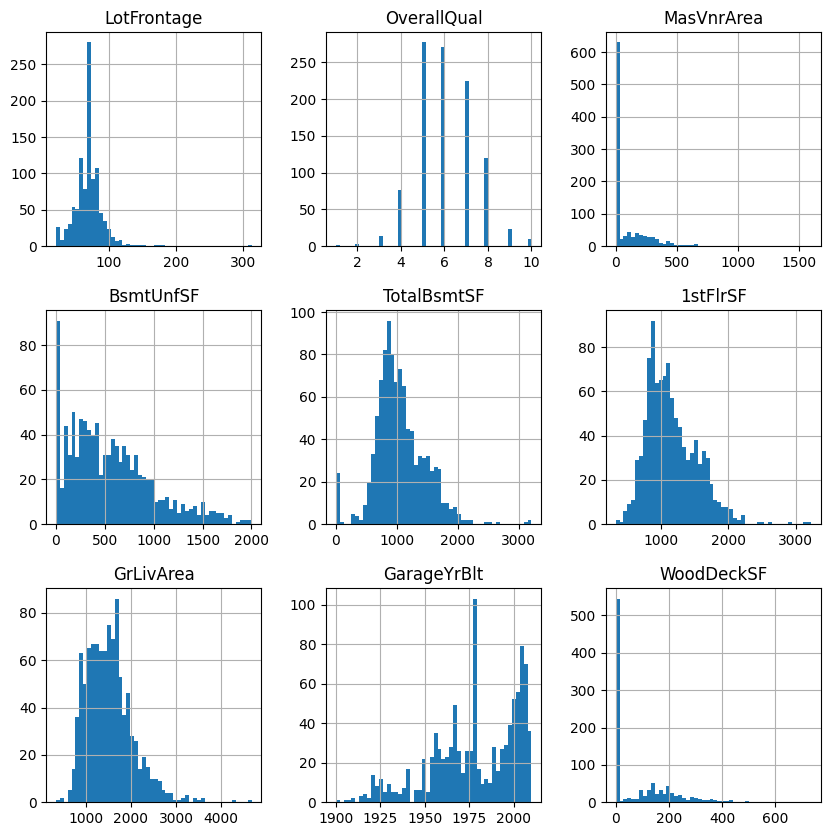

In [ ]:
# Let's explore the change in the distributions after the median imputation

X_train.hist(bins=50, figsize=(10, 10))
plt.show()

The tall bar at the value of the median in the histogram occurs after the data imputation in the variable LotFrontAge.

**CAUTION**: 

When transforming the numpy arrays back to a dataframe, be careful not to change the order of the columns!

You need to be extremely careful to pass the columns to the pd.DataFrame command in the same order in which they were in the X_train BEFORE the transformation!.

# SimpleImputer - dataframe

SimpleImputer returns a numpy array by default. If you want to return a dataframe, you can set_output(transform="pandas") as shown below.

Earlier it (SimpleImputer) just used to return a numpy array.

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

In [ ]:
# set up the imputer

imputer = SimpleImputer(strategy="mean").set_output(transform="pandas") #setting the output to pandas DataFrame

In [ ]:
# We fit the imputer to the train set.

imputer.fit(X_train)

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [ ]:
# the learn mean values:

imputer.statistics_

array([  69.66866747,    6.07925636,  103.55358899,  565.99217221,
       1055.34344423, 1161.7221135 , 1522.13796477, 1978.01239669,
         94.85225049])

In [ ]:
# impute missing data

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# the resulting dataframe
X_train.head()

# Note: We can easiy use transform and get dataframe output as below:

"""We didn't use 
X_train = pd.DataFrame(
    X_train, # the numpy array we got after imputation
    columns=imputer.get_feature_names_out(),  # the variable names
)

this time"""

"We didn't use \nX_train = pd.DataFrame(\n    X_train, # the numpy array we got after imputation\n    columns=imputer.get_feature_names_out(),  # the variable names\n)\n\nthis time"

In [ ]:
# check missing values

X_train.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

In [ ]:
X_train.head(20)

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF
64,69.668667,7.0,573.0,318.0,1057.0,1057.0,2034.0,1998.000000,576.0
682,69.668667,6.0,0.0,288.0,1291.0,1291.0,1291.0,1996.000000,307.0
960,50.000000,5.0,0.0,162.0,858.0,858.0,858.0,1978.012397,117.0
1384,60.000000,6.0,0.0,356.0,560.0,698.0,1258.0,1939.000000,0.0
1100,60.000000,2.0,0.0,0.0,290.0,438.0,438.0,1930.000000,0.0
416,74.000000,6.0,203.0,463.0,672.0,672.0,1400.0,1978.000000,0.0
1034,50.000000,5.0,0.0,920.0,920.0,954.0,954.0,1938.000000,0.0
853,69.668667,6.0,115.0,563.0,1127.0,1445.0,1445.0,1964.000000,180.0
472,35.000000,6.0,80.0,88.0,547.0,1072.0,1072.0,2005.000000,0.0
1011,75.000000,5.0,0.0,0.0,0.0,1664.0,1664.0,1978.012397,0.0


# SimpleImputer - feature subsets

To apply the imputation to a feature subset we need to use the [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html).

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),  # just the features
    data["SalePrice"],  # the target
    test_size=0.3,  # the percentage of obs in the test set
    random_state=0,  # for reproducibility
)

I will impute:

- LotFrontage with the mean
- MasVnrArea and GarageYrBlt with the median

In [ ]:
# Here for LotFrontage we will use mean imputation and gave the name "mean_imputer"
# for MasVnrArea and GarageYrBlt we will use median imputation and gave the name "median_imputer"

imputer = ColumnTransformer(
    transformers=[
        ("mean_imputer", SimpleImputer(strategy="mean"), ["LotFrontage"]),
        (
            "median_imputer",
            SimpleImputer(strategy="median"),
            ["MasVnrArea", "GarageYrBlt"],
        ),
    ],
    remainder="passthrough", # We want to keep the other columns as they are
    # if used remainder='drop', it will drop the other columns
)

# We need to add remainder = True to indicate that what we want
# ALL the columns returned at the end of the transformation

In [ ]:
# set output to be a dataframe

imputer.set_output(transform="pandas") #setting the output to pandas DataFrame

,transformers,"[('mean_imputer', ...), ('median_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [ ]:
# Now we fit the preprocessor:

imputer.fit(X_train) # it learns from the train set ( Learns mean value for LotFrontage and median for the other two Column)

,transformers,"[('mean_imputer', ...), ('median_imputer', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [ ]:
# We can explore the imputers like this:

imputer.transformers

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt'])]

In [ ]:
# And we can look at the parameters learned
# by the imputers like this:

# for the mean imputer:

# here used the name we gave earlier
imputer.named_transformers_["mean_imputer"].statistics_

array([69.66866747])

In [ ]:
# The median imputer learned 2 median values
# because we wanted to impute 2 different variables.

imputer.named_transformers_["median_imputer"].statistics_

array([   0., 1979.])

In [ ]:
# and now we can impute the data

# we have used the imputed values

X_train = imputer.transform(X_train)

# check resulting dataframe
X_train.head()

# Note: the column names have changed because of the ColumnTransformer and added the imputer names as prefixes.

,mean_imputer__LotFrontage,median_imputer__MasVnrArea,median_imputer__GarageYrBlt,remainder__OverallQual,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__1stFlrSF,remainder__GrLivArea,remainder__WoodDeckSF
64,69.668667,573.0,1998.0,7,318,1057,1057,2034,576
682,69.668667,0.0,1996.0,6,288,1291,1291,1291,307
960,50.000000,0.0,1979.0,5,162,858,858,858,117
1384,60.000000,0.0,1939.0,6,356,560,698,1258,0
1100,60.000000,0.0,1930.0,2,0,290,438,438,0


In [ ]:
# and now we can impute the test set
X_test = imputer.transform(X_test)

# check resulting test set
X_test.head()

,mean_imputer__LotFrontage,median_imputer__MasVnrArea,median_imputer__GarageYrBlt,remainder__OverallQual,remainder__BsmtUnfSF,remainder__TotalBsmtSF,remainder__1stFlrSF,remainder__GrLivArea,remainder__WoodDeckSF
529,69.668667,0.0,1975.0,6,816,2035,2515,2515,0
491,79.000000,0.0,1941.0,6,238,806,958,1578,0
459,69.668667,161.0,1950.0,5,524,709,979,1203,0
279,83.000000,299.0,1977.0,7,768,1160,1156,2022,288
655,21.000000,381.0,1971.0,6,525,525,525,1092,0


In [ ]:
X_test.isnull().sum()

mean_imputer__LotFrontage      0
median_imputer__MasVnrArea     0
median_imputer__GarageYrBlt    0
remainder__OverallQual         0
remainder__BsmtUnfSF           0
remainder__TotalBsmtSF         0
remainder__1stFlrSF            0
remainder__GrLivArea           0
remainder__WoodDeckSF          0
dtype: int64

**CAUTION**

The ColumnTransformer is, in essence, just slicing the dataframe into the required feature subsets. The SimpleImputer then performs operations on the sliced dataframes. Finally, the dataframes are put back together for the final output.

That means that the order of the columns is not the same as in the training set!